# Decay time experiment
Author: Aleksander Filip Żarnecki (University of Warsaw)

In [1]:
import math
import numpy as np
import scipy.stats as scist
import matplotlib.pyplot as plt

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 


NameError: name 'gROOT' is not defined

### (1) Define decay time experiment

In [3]:
# Generate given number of decays and return total time

def nDecTime(ndec,tmean):
    ttot = 0
    t1 = np.random.exponential(tmean,ndec)   # generate ndec decay times in one call
    ttot = np.sum(t1)
    return ttot

### (2) Run multiple experiments

In [4]:
# Number of decay sequences to measure

Ntry = 1000

# Number of decays required in one sequence

Ndec =1

# Mean lifetime

tmean = 1.

# Array to store results

exp_data = np.empty(Ntry)

# Main experiment loop

for i in  range(Ntry):
    exp_data[i] = nDecTime(Ndec,tmean)


### (3) Plot results

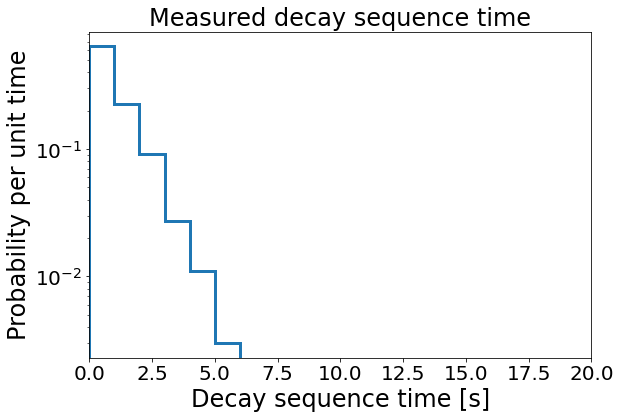

In [5]:
# Hiostogram range

tmax = 20.  # maximum time
Nbin = 20   # number of bins

# Plot histogram

plt.figure(figsize=(9, 6))

plt.hist(exp_data,bins=Nbin, range=[0.,tmax], density=True, log=True, histtype='step',linewidth=3)

plt.xlabel('Decay sequence time [s]',size=24)
plt.ylabel('Probability per unit time',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Measured decay sequence time",size=24)
plt.xlim([0.,tmax])

fname = '03_gamma_'+str(Ndec)+'.png'
plt.savefig(fname)

plt.show()

### (4) Compare with expectations

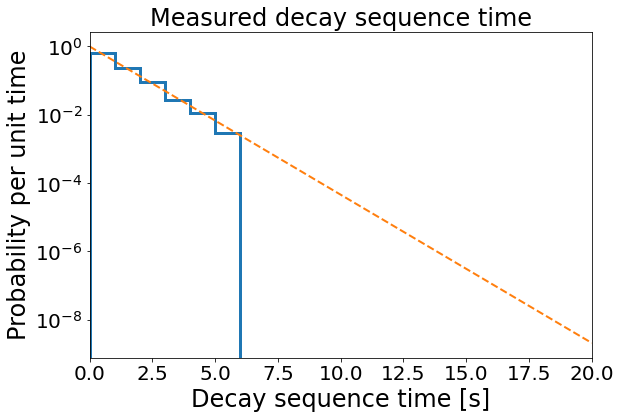

In [6]:
# Plot histogram

plt.figure(figsize=(9, 6))

plt.hist(exp_data,bins=Nbin, range=[0.,tmax], density=True, log=True, histtype='step',linewidth=3)

plt.xlabel('Decay sequence time [s]',size=24)
plt.ylabel('Probability per unit time',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Measured decay sequence time",size=24)
plt.xlim([0.,tmax])

# Expected distribution

def myExp(x):
    return scist.gamma.pdf(x,Ndec)

tref = np.linspace(0.,tmax,100)
pref = myExp(tref)

plt.plot(tref,pref,'--',linewidth=2)

fname = '03_gamma2_'+str(Ndec)+'.png'
plt.savefig(fname)

plt.show()